## A Gentle Guide to the world of disruptive deep learning audio applications and architectures.
1. [State-of-the-Art Techniques](https://ketanhdoshi.github.io/Audio-Intro/) — this article (What is sound and how it is digitized. What problems is audio deep learning solving in our daily lives. What are Spectrograms and why they are all-important.)
2. [Why Mel Spectrograms perform better](https://ketanhdoshi.github.io/Audio-Mel/) (Processing audio data in Python. What are Mel Spectrograms and how to generate them)
3. [Feature Optimization and Augmentation](https://ketanhdoshi.github.io/Audio-Augment/) (Enhance Spectrograms features for optimal performance by hyper-parameter tuning and data augmentation)
4. [Audio Classification](https://ketanhdoshi.github.io/Audio-Classification/) (End-to-end example and architecture to classify ordinary sounds. Foundational application for a range of scenarios.)
5. [Automatic Speech Recognition](https://ketanhdoshi.github.io/Audio-ASR/) (Speech-to-Text algorithm and architecture, using CTC Loss and Decoding for aligning sequences.)

### What is sound?
We all remember from school that a sound signal is produced by variations in air pressure. We can measure the intensity of the pressure variations and plot those measurements over time.

Sound signals often repeat at regular intervals so that each wave has the same shape. The height shows the intensity of the sound and is known as the amplitude.

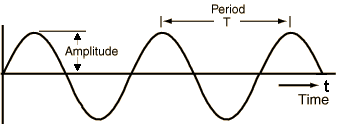

The time taken for the signal to complete one full wave is the period. The number of waves made by the signal in one second is called the frequency. The frequency is the reciprocal of the period. The unit of frequency is Hertz.
The majority of sounds we encounter may not follow such simple and regular periodic patterns. But signals of different frequencies can be added together to create composite signals with more complex repeating patterns.

### How do we represent sound digitally?
To digitize a sound wave we must turn the signal into a series of numbers so that we can input it into our models. This is done by measuring the amplitude of the sound at fixed intervals of time.

Sample measurements at regular time intervals
https://commons.wikimedia.org/wiki/File:Signal_Sampling.png

Each such measurement is called a sample, and the sample rate is the number of samples per second. For instance, a common sampling rate is about 44,100 samples per second. That means that a 10-second music clip would have 441,000 samples!

### Preparing audio data for a deep learning model
What is more interesting is that, with deep learning, we don’t actually deal with audio data in its raw form. Instead, the common approach used is to convert the audio data into images and then use a standard CNN architecture to process those images! Really? Convert sound into pictures? That sounds like science fiction.
This is done by generating Spectrograms from the audio. So first let’s learn what a Spectrum is, and use that to understand Spectrograms.

#### Spectrum
As we discussed earlier, signals of different frequencies can be added together to create composite signals, representing any sound that occurs in the real-world. This means that any signal consists of many distinct frequencies and can be expressed as the sum of those frequencies.
The Spectrum is the set of frequencies that are combined together to produce a signal. eg. the picture shows the spectrum of a piece of music.
The Spectrum plots all of the frequencies that are present in the signal along with the strength or amplitude of each frequency.
Spectrum showing the frequencies that make up a sound signal (![Source](https://www.sfu.ca/sonic-studio-webdav/handbook/Graphics/Spectrum2.gif), 

by permission of Prof Barry Truax)
The lowest frequency in a signal called the fundamental frequency. Frequencies that are whole number multiples of the fundamental frequency are known as harmonics.
For instance, if the fundamental frequency is 200 Hz, then its harmonic frequencies are 400 Hz, 600 Hz, and so on.

#### Time Domain vs Frequency Domain
The Spectrum is an alternate way to represent the same signal. It shows Amplitude against Frequency, and since the x-axis shows the range of frequency values of the signal, at a moment in time, we are viewing the signal in the Frequency Domain.

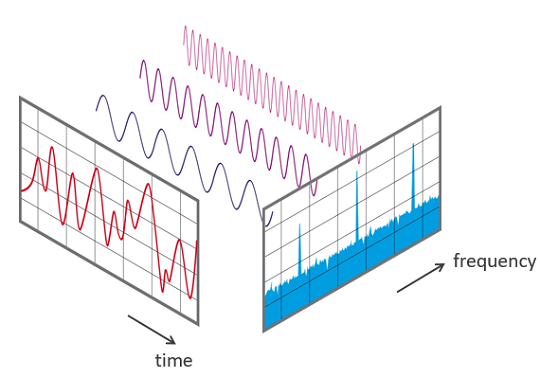

#### Spectrograms
Since a signal produces different sounds as it varies over time, its constituent frequencies also vary with time. In other words, its Spectrum varies with time.

A Spectrogram of a signal plots its Spectrum over time and is like a ‘photograph’ of the signal. It plots Time on the x-axis and Frequency on the y-axis. It is as though we took the Spectrum again and again at different instances in time, and then joined them all together into a single plot.
It uses different colors to indicate the Amplitude or strength of each frequency. The brighter the color the higher the energy of the signal. Each vertical ‘slice’ of the Spectrogram is essentially the Spectrum of the signal at that instant in time and shows how the signal strength is distributed in every frequency found in the signal at that instant.

In the example below, the first picture displays the signal in the Time domain ie. Amplitude vs Time. It gives us a sense of how loud or quiet a clip is at any point in time, but it gives us very little information about which frequencies are present.
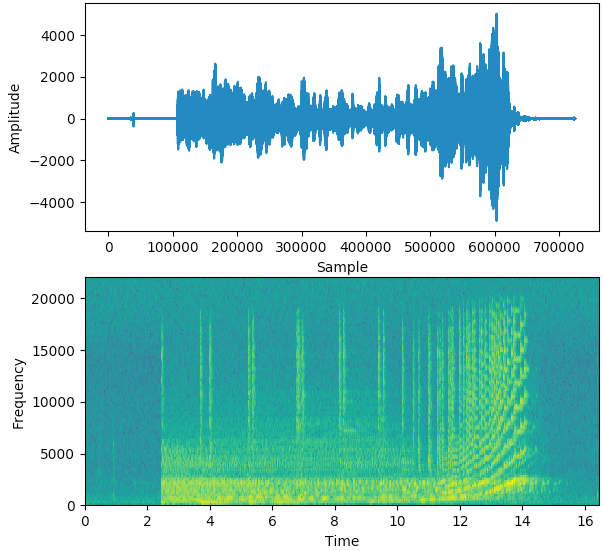

The second picture is the Spectrogram and displays the signal in the Frequency domain.

#### Generating Spectrograms
Spectrograms are produced using Fourier Transforms to decompose any signal into its constituent frequencies. If this makes you a little nervous because we have now forgotten all that we learned about Fourier Transforms during college, don’t worry 😄! We won’t actually need to recall all the mathematics, there are very convenient Python library functions that can generate spectrograms for us in a single step. We’ll see those in the next article.

#### Audio Deep Learning Models
Now that we understand what a Spectrogram is, we realize that it is an equivalent compact representation of an audio signal, somewhat like a ‘fingerprint’ of the signal. It is an elegant way to capture the essential features of audio data as an image.

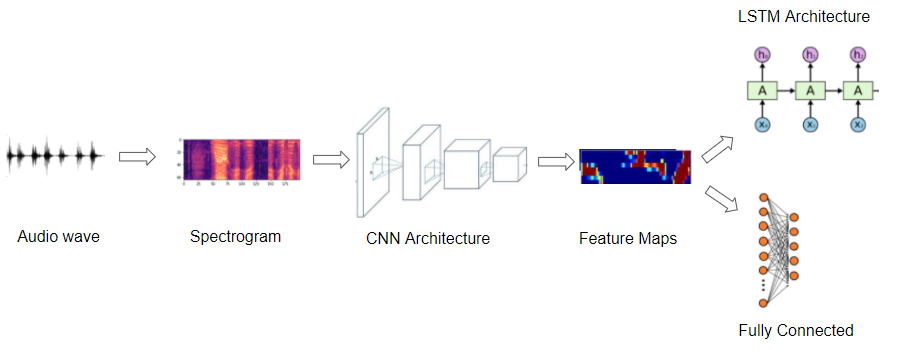

So most deep learning audio applications use Spectrograms to represent audio. They usually follow a procedure like this:

1. Start with raw audio data in the form of a wave file.
2. Convert the audio data into its corresponding spectrogram.
3. Optionally, use simple audio processing techniques to augment the spectrogram data. (Some augmentation or cleaning can also be done on the raw audio data before the spectrogram conversion)
4. Now that we have image data, we can use standard CNN architectures to process them and extract feature maps that are an encoded representation of the spectrogram image.
The next step is to generate output predictions from this encoded representation, depending on the problem that you are trying to solve.

- For instance, for an audio classification problem, you would pass this through a Classifier usually consisting of some fully connected Linear layers.
- For a Speech-to-Text problem, you could pass it through some RNN layers to extract text sentences from this encoded representation.

#### What problems does audio deep learning solve?

##### Speech to Text and Text to Speech
When dealing with human speech, we can go a step further, and not just recognize the speaker, but understand what they are saying. This involves extracting the words from the audio, in the language in which it is spoken and transcribing it into text sentences.

This is one of the most challenging applications because it deals not just with analyzing audio, but also with NLP and requires developing some basic language capability to decipher distinct words from the uttered sounds.

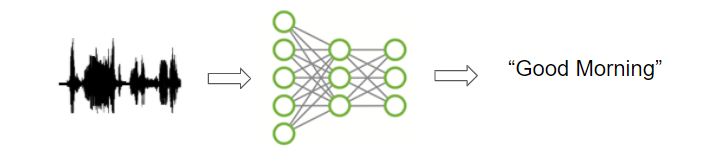




## Why Mel Spectrograms perform better

### Audio File Formats and Python Libraries
Audio data for your deep learning models will usually start out as digital audio files. From listening to sound recordings and music, we all know that these files are stored in a variety of formats based on how the sound is compressed. Examples of these formats are .wav, .mp3, .wma, .aac, .flac and many more.

Python has some great libraries for audio processing. Librosa is one of the most popular and has an extensive set of features. scipy is also commonly used. If you are using Pytorch, it has a companion library called torchaudio that is tightly integrated with Pytorch. It doesn’t have as much functionality as Librosa, but it is built specifically for deep learning.

They all let you read audio files in different formats. The first step is to load the file. With librosa:

Or, you can also do the same thing using scipy:

You can then visualize the sound wave:

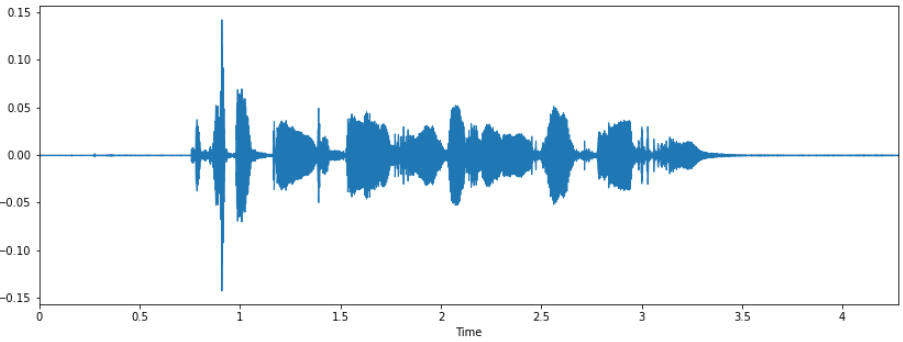

### Audio Signal Data
As we saw in the previous article, audio data is obtained by sampling the sound wave at regular time intervals and measuring the intensity or amplitude of the wave at each sample. The metadata for that audio tells us the sampling rate which is the number of samples per second.
`When that audio is saved in a file it is in a compressed format. When the file is loaded, it is decompressed and converted into a Numpy array. This array looks the same no matter which file format you started with.`
In memory, audio is represented as a time series of numbers, representing the amplitude at each timestep. For instance, if the sample rate was 16800, a one-second clip of audio would have 16800 numbers. Since the measurements are taken at fixed intervals of time, the data contains only the amplitude numbers and not the time values. Given the sample rate, we can figure out at what time instant each amplitude number measurement was taken.

The bit-depth tells us how many possible values those amplitude measurements for each sample can take. For example, a bit-depth of 16 means that the amplitude number can be between 0 and 65535 (2 ¹⁶ — 1). The bit-depth influences the resolution of the audio measurement — the higher the bit-depth, the better the audio fidelity.

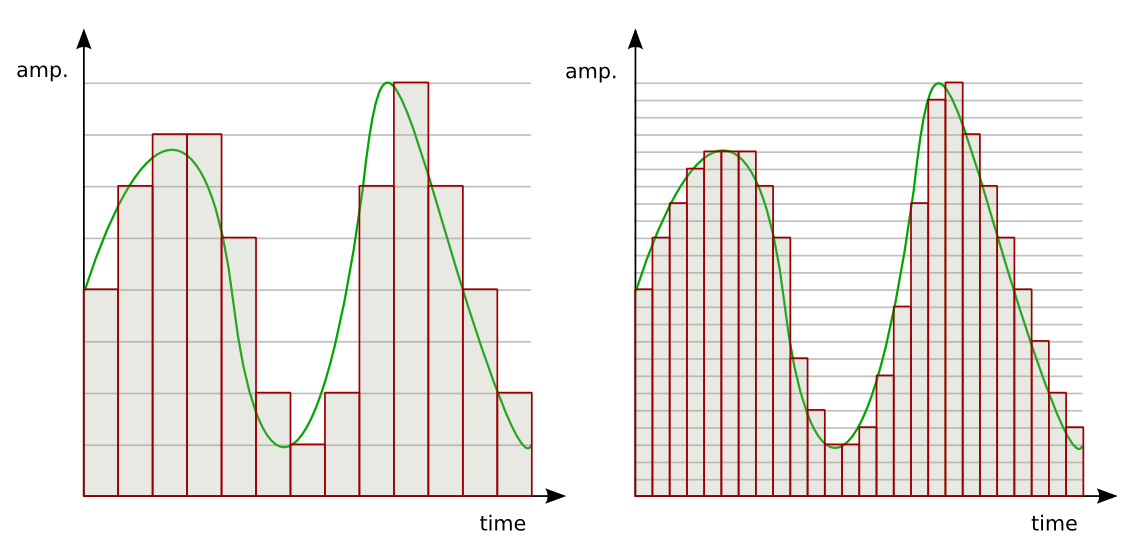

### Spectrograms
Deep learning models rarely take this raw audio directly as input. As we learned in Part 1, the common practice is to convert the audio into a spectrogram. The spectrogram is a concise ‘snapshot’ of an audio wave and since it is an image, it is well suited to being input to CNN-based architectures developed for handling images.
Spectrograms are generated from sound signals using Fourier Transforms. A Fourier Transform decomposes the signal into its constituent frequencies and displays the amplitude of each frequency present in the signal.
A Spectrogram chops up the duration of the sound signal into smaller time segments and then applies the Fourier Transform to each segment, to determine the frequencies contained in that segment. It then combines the Fourier Transforms for all those segments into a single plot.
It plots Frequency (y-axis) vs Time (x-axis) and uses different colors to indicate the Amplitude of each frequency. The brighter the color the higher the energy of the signal.

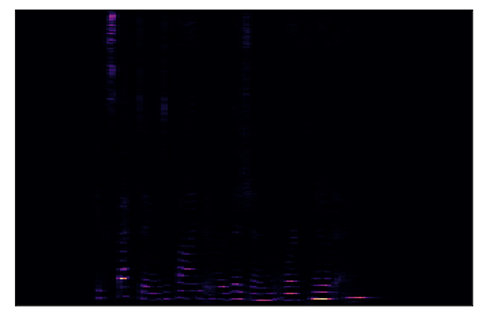

### How do humans hear frequencies?

The way we hear frequencies in sound is known as ‘pitch’. It is a subjective impression of the frequency. So a high-pitched sound has a higher frequency than a low-pitched sound. Humans do not perceive frequencies linearly. We are more sensitive to differences between lower frequencies than higher frequencies.

For instance, if you listened to different pairs of sound as follows:

- 100Hz and 200Hz
- 1000Hz and 1100Hz
- 10000Hz and 10100 Hz
What is your perception of the “distance” between each pair of sounds? Are you able to tell each pair of sounds apart?

Even though in all cases, the actual frequency difference between each pair is exactly the same at 100 Hz, the pair at 100Hz and 200Hz will sound further apart than the pair at 1000Hz and 1100Hz. And you will hardly be able to distinguish between the pair at 10000Hz and 10100Hz.

However, this may seem less surprising if we realize that the 200Hz frequency is actually double the 100Hz, whereas the 10100Hz frequency is only 1% higher than the 10000Hz frequency.

`This is how humans perceive frequencies. We hear them on a logarithmic scale rather than a linear scale. How do we account for this in our data?`

### Mel Scale
The Mel Scale was developed to take this into account by conducting experiments with a large number of listeners. It is a scale of pitches, such that each unit is judged by listeners to be equal in pitch distance from the next.

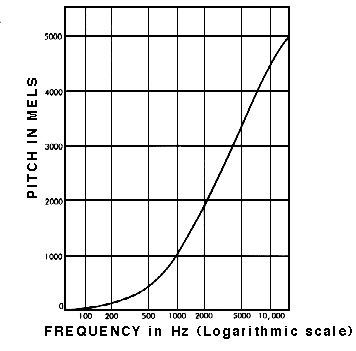

### How do humans hear amplitudes?

The human perception of the amplitude of a sound is its loudness. And similar to frequency, we hear loudness logarithmically rather than linearly. We account for this using the Decibel scale.

#### Decibel Scale

On this scale, 0 dB is total silence. From there, measurement units increase exponentially. 10 dB is 10 times louder than 0 dB, 20 dB is 100 times louder and 30 dB is 1000 times louder. On this scale, a sound above 100 dB starts to become unbearably loud.

We can see that, to deal with sound in a realistic manner, it is important for us to use a logarithmic scale via the Mel Scale and the Decibel Scale when dealing with Frequencies and Amplitudes in our data.

That is exactly what the Mel Spectrogram is intended to do.

### Mel Spectrograms
A Mel Spectrogram makes two important changes relative to a regular Spectrogram that plots Frequency vs Time.

1. It uses the Mel Scale instead of Frequency on the y-axis.
2. It uses the Decibel Scale instead of Amplitude to indicate colors.

For deep learning models, we usually use this rather than a simple Spectrogram.

Let’s modify our Spectrogram code above to use the Mel Scale in place of Frequency.

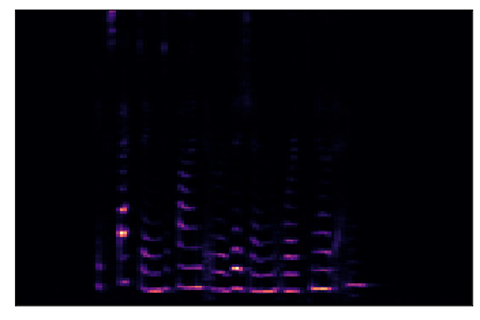

This is better than before, but most of the spectrogram is still dark and not carrying enough useful information. So let’s modify it to use the Decibel Scale instead of Amplitude.

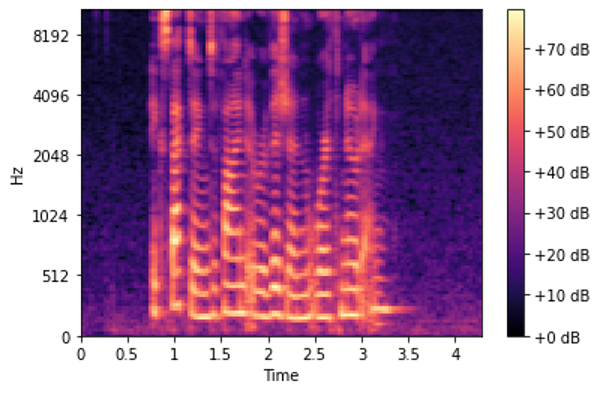





## A Gentle Guide to enhancing Spectrogram features for optimal performance. Also Data Augmentation

### Spectrograms Optimization with Hyper-parameter tuning
There are a number of hyper-parameters that we can use to tune how the Spectrogram is generated. For that, we need to understand a few concepts about how Spectrograms are constructed.

#### Fast Fourier Transform (FFT)
One way to compute Fourier Transforms is by using a technique called DFT (Discrete Fourier Transform). The DFT is very expensive to compute, so in practice, the FFT (Fast Fourier Transform) algorithm is used, which is an efficient way to implement the DFT.

However, the FFT will give you the overall frequency components for the entire time series of the audio signal as a whole. It won’t tell you how those frequency components change over time within the audio signal. You will not be able to see, for example, that the first part of the audio had high frequencies while the second part had low frequencies, and so on.

#### Short-time Fourier Transform (STFT)
To get that more granular view and see the frequency variations over time, we use the STFT algorithm (Short-Time Fourier Transform). The STFT is another variant of the Fourier Transform that breaks up the audio signal into smaller sections by using a sliding time window. It takes the FFT on each section and then combines them. It is thus able to capture the variations of the frequency with time.

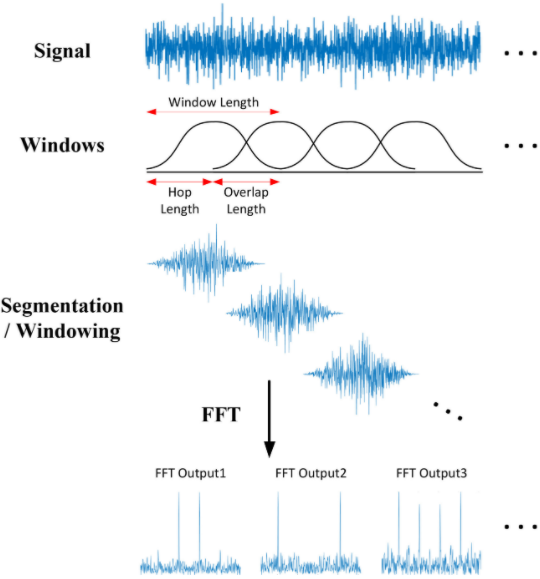

STFT slides an overlapping window along the signal and does a Fourier Transform on each segment (Source)

This splits the signal into sections along the Time axis. Secondly, it also splits the signal into sections along the Frequency axis. It takes the full range of frequencies and divides it up into equally spaced bands (in the Mel scale). Then, for each section of time, it calculates the Amplitude or energy for each frequency band.

Let’s make this clear with an example. We have a 1-minute audio clip that contains frequencies between 0Hz and 10000 Hz (in the Mel scale). Let’s say that the Mel Spectrogram algorithm:

Chooses windows such that it splits our audio signal into 20 time-sections
Decides to split our frequency range into 10 bands (ie. 0–1000Hz, 1000–2000Hz, … 9000–10000Hz).
The final output of the algorithm is a 2D Numpy array of shape (10, 20) where:

- Each of the 20 columns represents the FFT for one time-section.
- Each of the 10 rows represents Amplitude values for a frequency band.
Let’s take the first column, which is the FFT for the first time section. It has 10 rows.

The first row is the Amplitude for the first frequency band between 0–1000 Hz.
The second row is the Amplitude for the second frequency band between 1000–2000 Hz.
… and so on.
Each column in the array becomes a ‘column’ in our Mel Spectrogram image.

#### Mel Spectrogram Hyperparameters
This gives us the hyperparameters for tuning our Mel Spectrogram. We’ll use the parameter names that Librosa uses. (Other libraries will have equivalent parameters)

Frequency Bands

- fmin — minimum frequency
- fmax — maximum frequency to display
- n_mels — number of frequency bands (ie. Mel bins). This is the height of the Spectrogram
- Time Sections

n_fft — window length for each time section
hop_length — number of samples by which to slide the window at each step. Hence, the width of the Spectrogram is = Total number of samples / hop_length
You can adjust these hyperparameters based on the type of audio data that you have and the problem you’re solving.

#### MFCC
Mel Spectrograms work well for most audio deep learning applications. However, for problems dealing with human speech, like Automatic Speech Recognition, you might find that MFCC (Mel Frequency Cepstral Coefficients) sometimes work better.

These essentially take Mel Spectrograms and apply a couple of further processing steps. This selects a compressed representation of the frequency bands from the Mel Spectrogram that correspond to the most common frequencies at which humans speak.

**`import sklearn
import librosa
import librosa.display
###### Load the audio file
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
###### Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
###### MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)`**

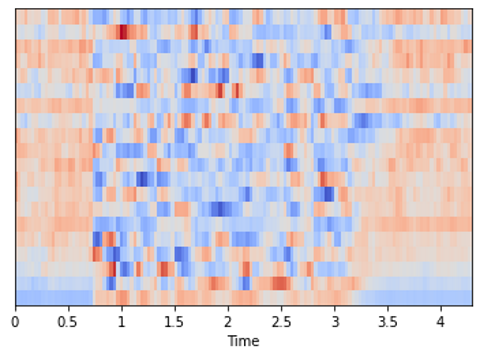

Above, we had seen that the Mel Spectrogram for this same audio had shape (128, 134), whereas the MFCC has shape (20, 134). The MFCC extracts a much smaller set of features from the audio that are the most relevant in capturing the essential quality of the sound.

#### Data Augmentation
A common technique to increase the diversity of your dataset, particularly when you don’t have enough data, is to augment your data artificially. We do this by modifying the existing data samples in small ways.

For instance, with images, we might do things like rotate the image slightly, crop or scale it, modify colors or lighting, or add some noise to the image. Since the semantics of the image haven’t changed materially, so the same target label from the original sample will still apply to the augmented sample. eg. if the image was labeled as a ‘cat’, the augmented image will also be a ‘cat’.

But, from the model’s point of view, it feels like a new data sample. This helps your model generalize to a larger range of image inputs.

Just like with images, there are several techniques to augment audio data as well. This augmentation can be done both on the raw audio before producing the spectrogram, or on the generated spectrogram. `Augmenting the spectrogram usually produces better results`.

##### Spectrogram Augmentation

- Time stretching — We can stretch or compress the audio signal by multiplying the time axis of the spectrogram by a random factor.
- Pitch Shifting — We can shift the pitch of the audio by adding or subtracting a random number of semitones.
- Noise Injection — We can add random noise to the audio signal.
- Time masking — We can randomly mask out ranges of time from the spectrogram by using vertical bars.
The normal transforms you would use for an image don’t apply to spectrograms. For instance, a horizontal flip or a rotation would substantially alter the spectrogram and the sound that it represents.

Instead, we use a method known as SpecAugment where we block out sections of the spectrogram. There are two flavors:

Frequency mask — randomly mask out a range of consecutive frequencies by adding horizontal bars on the spectrogram.
Time mask — similar to frequency masks, except that we randomly block out ranges of time from the spectrogram by using vertical bars.

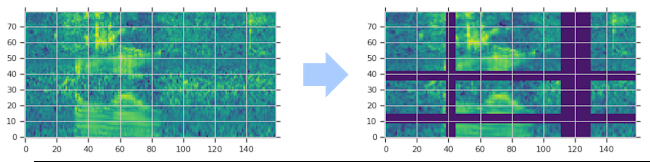

##### Raw Audio Augmentation

- Speed Perturbation — We can speed up or slow down the audio by multiplying the time axis of the spectrogram by a random factor.
- Pitch Shifting — We can shift the pitch of the audio by adding or subtracting a random number of semitones.
- Noise Injection — We can add random noise to the audio signal.
- Time stretching — We can stretch or compress the audio signal by multiplying the time axis of the spectrogram by a random factor.

There are several options:

Time Shift — shift audio to the left or the right by a random amount.

For sound such as traffic or sea waves which has no particular order, the audio could wrap around.

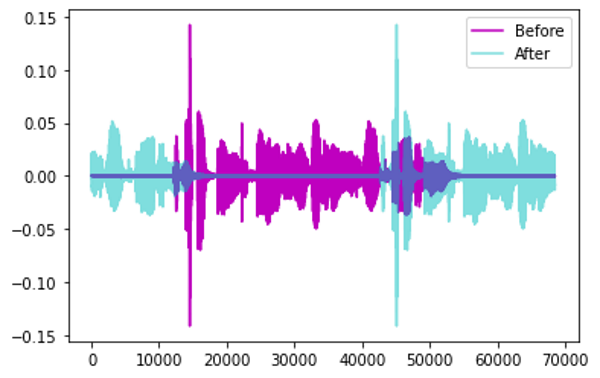

Augmentation by Time Shift (Image by Author)

Alternately, for sounds such as human speech where the order does matter, the gaps can be filled with silence.
Pitch Shift — randomly modify the frequency of parts of the sound.

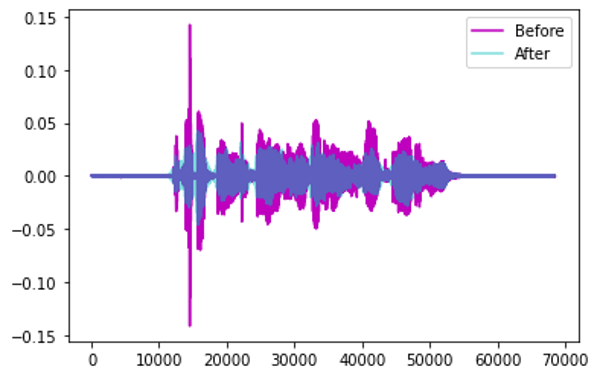

Time Stretch — randomly slow down or speed up the sound.
Add Noise — add some random values to the sound.
